In [3]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os


os.chdir('../Dataset')
path = os.getcwd()


columns = ['class','l_shoulder','r_shoulder','l_arm','r_arm','l_hip','r_hip','l_knee','r_knee']

Y82_test = pd.read_csv(os.path.join(path,'Y82_testing_new.csv'), header=None)
Y82_train = pd.read_csv(os.path.join(path,'Y82_training_new.csv'), header=None)

L_test = pd.read_csv(os.path.join(path,'L_testing_new.csv'), header=None)
L_train = pd.read_csv(os.path.join(path,'L_training_new.csv'), header=None)

W2_test = pd.read_csv(os.path.join(path,'W2_testing_new.csv'), header=None)
W2_train = pd.read_csv(os.path.join(path,'W2_training_new.csv'), header=None)

combined_test = pd.concat([L_test, Y82_test, W2_test])
combined_train = pd.concat([L_train, Y82_train, W2_train])

combined_test.columns = columns 
combined_train.columns = columns 

combined_test['class'], classes = pd.factorize(combined_test['class'])
combined_train['class'], _ = pd.factorize(combined_train['class'])

''' Filtering out all the extra examples for the cobra class to make a more balanced data set '''
extra_test_cobra_rows = combined_test[combined_test['class'] == 1].sample(130)
extra_train_cobra_rows = combined_train[combined_train['class'] == 1].sample(275)

combined_test = combined_test.drop(extra_test_cobra_rows.index)
combined_train = combined_train.drop(extra_train_cobra_rows.index)

classes = list(classes)

In [4]:
all_combined_df = pd.concat([Y82_train, Y82_test, L_test, L_train, W2_train, W2_test])
all_combined = pd.concat([combined_test, combined_train])

def split_features_labels(df):
    return df.drop('class', axis=1), df['class']

## Well shit, some late night testing, and i've discovered there's kinda a big class imbalance, the first 3 are alright but WarriorIII is kinda meh and Cobra is horrendus

In [5]:
for i, c in enumerate(classes):
    print(f"{len(combined_train[combined_train['class'] == i])/len(combined_train):.2f}% of data is {c} : ({len(combined_train[combined_train['class'] == i])}) Examples")

0.22% of data is Tree : (368) Examples
0.19% of data is Cobra : (320) Examples
0.18% of data is Chair : (306) Examples
0.17% of data is DownDog : (287) Examples
0.23% of data is WarriorII : (376) Examples


In [62]:
'''
Extracts labels and data. 
Returns: Data, Classes 
'''
def split_features_labels(df):
    return df.drop('class', axis=1), df['class']


# First Attempt
## This was horrible don't pay attention
Doing K-NN Kfold kinda manually using lab stuff

In [5]:
#define function to  calculate accuracy
def acc(predictions, ground_truth):
    TPTN = 0 
    
    for pred, truth in zip(predictions, ground_truth):
        TPTN += pred == truth 
        
    return TPTN, len(predictions)


def cross_validation(df, k, fold):
    kf = KFold(fold)
    
    g_tptn = 0 
    g_total = 0 
    
    for train, validation in kf.split(df):
        train_df = df.iloc[train].copy()
        validation_df = df.iloc[validation].copy()
        
        model = KNN(n_neighbors = k)
        
        train_data, train_labels = split_features_labels(train_df)
        model.fit(train_data, train_labels)
        
        validation_data, validation_labels = split_features_labels(validation_df)
        
        predictions = model.predict(validation_data)
        
        TPTN, total = acc(predictions, validation_labels)
        
        g_tptn += TPTN
        g_total += total 
        
    return g_tptn / g_total 

for k in range(1, 20):
    print(f'{k=} | fold = 10 | Acc: {cross_validation(df, k=k, fold=10)}')

k=1 | fold = 10 | Acc: 0.9140271493212669
k=2 | fold = 10 | Acc: 0.9064856711915535
k=3 | fold = 10 | Acc: 0.8868778280542986
k=4 | fold = 10 | Acc: 0.8788335847159376
k=5 | fold = 10 | Acc: 0.881850175967823
k=6 | fold = 10 | Acc: 0.8793363499245852
k=7 | fold = 10 | Acc: 0.8763197586726998
k=8 | fold = 10 | Acc: 0.8788335847159376
k=9 | fold = 10 | Acc: 0.8758169934640523
k=10 | fold = 10 | Acc: 0.8768225238813474
k=11 | fold = 10 | Acc: 0.8763197586726998
k=12 | fold = 10 | Acc: 0.877325289089995
k=13 | fold = 10 | Acc: 0.8793363499245852
k=14 | fold = 10 | Acc: 0.8783308195072901
k=15 | fold = 10 | Acc: 0.8793363499245852
k=16 | fold = 10 | Acc: 0.877325289089995
k=17 | fold = 10 | Acc: 0.877325289089995
k=18 | fold = 10 | Acc: 0.8768225238813474
k=19 | fold = 10 | Acc: 0.8763197586726998


# Second Attempt
## Horrible, but not as bad as before
Using more libs this time, maybe get better accuracy

In [63]:
# Using Cross Validation 
X, Y = split_features_labels(combined_train)

def cv(k):
    knn = KNN(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, Y, cv=10)

    print(f'K: {k} Acc: {np.mean(cv_scores)}')

for k in range(1, 25):
    cv(k)

K: 1 Acc: 0.8637430167597765
K: 2 Acc: 0.8648603351955307
K: 3 Acc: 0.8570701427684668
K: 4 Acc: 0.8643140906269398
K: 5 Acc: 0.8598603351955308
K: 6 Acc: 0.8637461204220982
K: 7 Acc: 0.857635009310987
K: 8 Acc: 0.857094972067039
K: 9 Acc: 0.8576536312849161
K: 10 Acc: 0.8493078833022967
K: 11 Acc: 0.8481998758535072
K: 12 Acc: 0.8443047796399752
K: 13 Acc: 0.844298572315332
K: 14 Acc: 0.8459683426443203
K: 15 Acc: 0.8448603351955308
K: 16 Acc: 0.8393047796399753
K: 17 Acc: 0.8393078833022967
K: 18 Acc: 0.8359745499689634
K: 19 Acc: 0.8370918684047176
K: 20 Acc: 0.8365332091868405
K: 21 Acc: 0.8337616387337057
K: 22 Acc: 0.8331998758535072
K: 23 Acc: 0.8326443202979515
K: 24 Acc: 0.8315332091868404


# Third Attempt
## Using grid search with cross validation to find the best hyper paramters

In [7]:

''' Don't need to do this anymore, cause the dataset is already split (Didn't realise this) '''
# from sklearn.model_selection import train_test_split
# 80/20 Split of data, Doesn't randomize, Randomsplit ensures the proportion of classes is the same. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RANDOM_ORDER_DATA = True 

'''Shuffle data for better resuliting'''
if RANDOM_ORDER_DATA:
    mutated_train = combined_train.sample(frac=1)
else:
    mutated_train = combined_train

X, y = split_features_labels(mutated_train)

max_neighbours = int(np.sqrt(len(X)))
knn_algorithms = ['kd_tree', 'brute', 'ball_tree']

# Grid searching best hyper params 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()

param_grid = {'n_neighbors' : np.arange(1, max_neighbours),
              'algorithm' : knn_algorithms}

# Using grid search cross validation to find the best value of K 
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

'''Shuffle then fit model to data'''
knn_gscv.fit(X, y)

knn_gscv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 4}

Best Params: {'algorithm': 'kd_tree', 'n_neighbors': 4} ~ Best Score: 0.9306064135696867

[('Tree', 0), ('Cobra', 1), ('Chair', 2), ('DownDog', 3), ('WarriorII', 4)]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       110
           1       0.95      0.99      0.97       124
           2       0.96      0.91      0.94       141
           3       0.98      0.98      0.98       107
           4       0.97      0.96      0.97       135

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



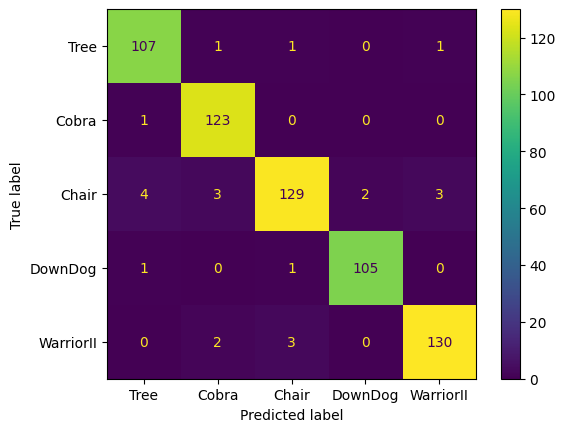

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print(f'Best Params: {knn_gscv.best_params_} ~ Best Score: {knn_gscv.best_score_}\n')

X_test, y_test = split_features_labels(combined_test)
pred = knn_gscv.predict(X_test)

cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()


print(f'{list(zip(classes, range(5)))}\n')
print(classification_report(y_test, pred))


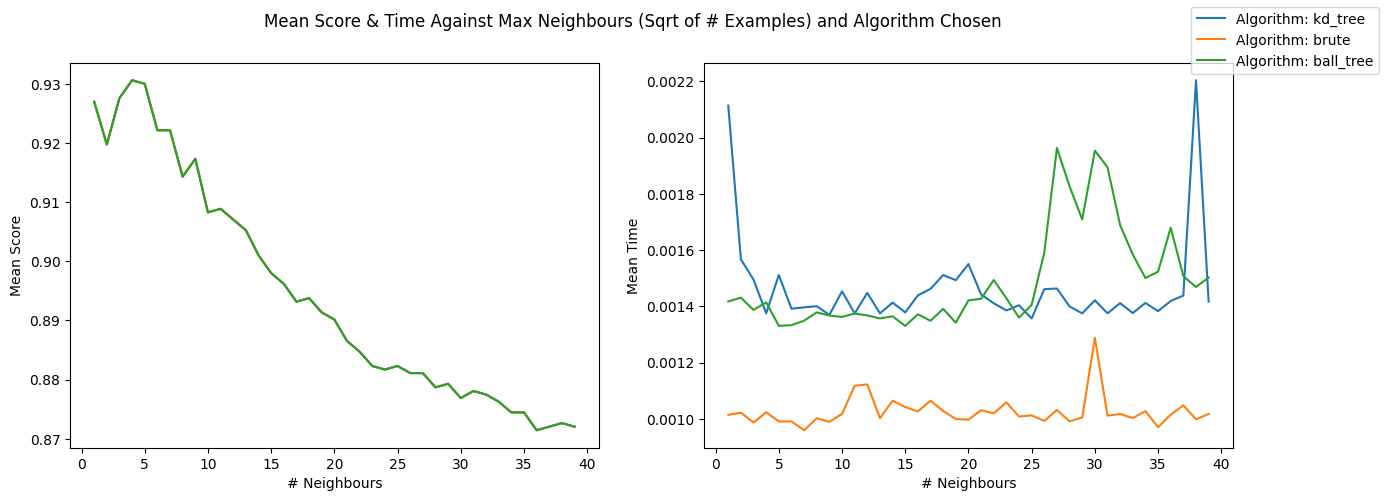

In [9]:
import matplotlib.pyplot as plt
att = [x for x in knn_gscv.cv_results_]

scores = [x for x in knn_gscv.cv_results_['mean_test_score']]
times = [x for x in knn_gscv.cv_results_['mean_fit_time']]

''' Sanity checking scores for each algorithm are the same, hence the plotting of the graph. Weird why this is the case, ask victor '''
first_third = scores[:len(scores)//3]
second_third = scores[len(scores)//3: 2 * (len(scores)//3)]
third_third = scores[2 * (len(scores)//3) : 3 * (len(scores) // 3)]


scores = np.array(scores).reshape(len(knn_algorithms), max_neighbours-1)
times = np.array(times).reshape(len(knn_algorithms), max_neighbours-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Mean Score & Time Against Max Neighbours (Sqrt of # Examples) and Algorithm Chosen')
for idx, alg in enumerate(knn_algorithms):
    ax1.plot(range(1, max_neighbours), scores[idx], label='Algorithm: ' + alg)
    ax2.plot(range(1, max_neighbours), times[idx], label='Algorithm: ' + alg)
    
ax1.set(xlabel='# Neighbours', ylabel='Mean Score') 
ax2.set(xlabel='# Neighbours', ylabel='Mean Time') 
    
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

## Important Note

The left graph has the exact same score for all 3 algorithms, which I'm unsure why and is something I'll have to try and figure out.. Ask victor, maybe not a problem?

# K-NN What the heck
Done KNN 3 different ways, all with super high accuracies and best K being at 1. Ask victor, not sure if something is messed up??

### Trying to project onto 2D Subspacehaha

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def pca_decomp(data: np.ndarray) -> np.ndarray:
    u, s, vh = np.linalg.svd(data, full_matrices=True)

    return vh

# Just dropping the label column from our dataset 
X, Y = split_features_labels(combined_train)

X = X.to_numpy()

# 3D Projection

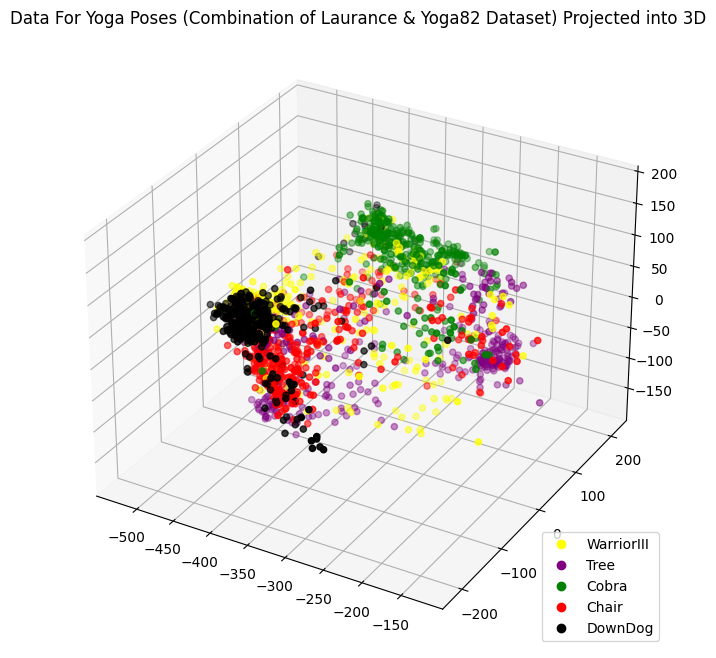

In [110]:
# Calculating our PCs
W = pca_decomp(X)[:3]
Z = np.matmul(X, W.transpose())

first_dimension = Z[:,0]
second_dimension = Z[:,1]
third_dimension = Z[:,2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(first_dimension, second_dimension, third_dimension, c=Y, cmap = ListedColormap(['yellow','purple','blue','green','red', 'black']))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='lower right')
plt.title("Data For Yoga Poses (Combination of Laurance & Yoga82 Dataset) Projected into 3D")
plt.show()


# 2D Projection

## Data appears to not be linearly seperable, potentially projecting to higher dimensional subspace and trying see if data is linearly spereapble in a feature defined by a non-linear PCA. Try to dig further into this ??

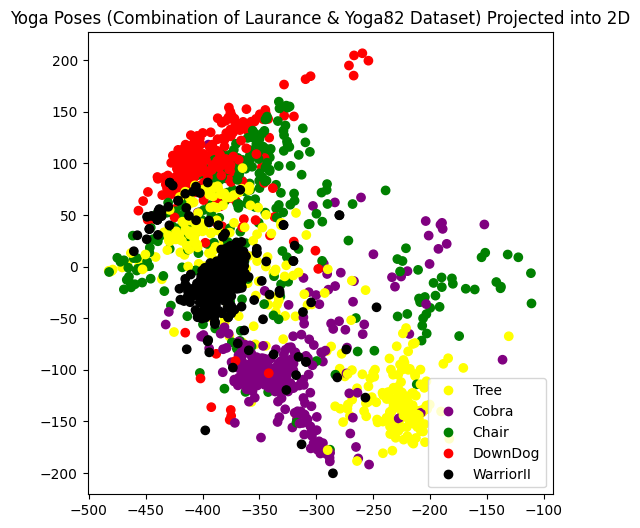

In [12]:
# Calculating our PCs
W = pca_decomp(X)[:3]
Z = np.matmul(X, W.transpose())

first_dimension = Z[:,0]
second_dimension = Z[:,1]

plt.figure(figsize=(6,6))

scatter = plt.scatter(first_dimension, second_dimension, c=Y, cmap = ListedColormap(['yellow','purple','blue','green','red', 'black']))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='lower right')
plt.title("Yoga Poses (Combination of Laurance & Yoga82 Dataset) Projected into 2D")
plt.show()